## Finding Precison, Recall, FalsePositive Rate(), FalseNegative Rate(Miss-detection)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
path = r"D:\Study\TextAnalytics\Lecture 8\Input.xlsx"
df = pd.read_excel(path)
print(df)

   Threshold  TP  FN  FP  TN  Correct  Incorrect  test Set
0          1  20  80   2  98      100        100       200
1          5  50  50   5  95      100        100       200
2         10  60  40  10  90      100        100       200
3         15  80  20  20  80      100        100       200
4         20  88  12  30  70      100        100       200
5         25  90  10  40  60      100        100       200
6         30  95   5  50  50      100        100       200
7         35  96   4  60  40      100        100       200
8         40  97   3  70  30      100        100       200
9         50  98   2  80  20      100        100       200


In [3]:
precision=[]
recall = []
fpr = []
fnr = []
f1 = []
for i in range(len(df)): 
    precision.append(df.iloc[i]['TP']/(df.iloc[i]['TP'] + df.iloc[i]['FP']))
    recall.append(df.iloc[i]['TP']/(df.iloc[i]['TP'] + df.iloc[i]['FN']))
    fpr.append(df.iloc[i]['FP']/(df.iloc[i]['FP'] + df.iloc[i]['TN']))
    fnr.append(df.iloc[i]['FN']/(df.iloc[i]['FN'] + df.iloc[i]['TP'])) #or 1-TPR
    f1.append((2*precision[i]*recall[i])/(precision[i]+recall[i]))

In [4]:
df['Precision'] = precision
df['Recall/TPR'] = recall
df['FPR'] = fpr
df['FNR/Miss-Detection'] = fnr
df['F1-Measure'] = f1

In [5]:
df

,Threshold,TP,FN,FP,TN,Correct,Incorrect,test Set,Precision,Recall/TPR,FPR,FNR/Miss-Detection,F1-Measure
0,1,20,80,2,98,100,100,200,0.909091,0.20,0.02,0.80,0.327869
1,5,50,50,5,95,100,100,200,0.909091,0.50,0.05,0.50,0.645161
2,10,60,40,10,90,100,100,200,0.857143,0.60,0.10,0.40,0.705882
3,15,80,20,20,80,100,100,200,0.800000,0.80,0.20,0.20,0.800000
4,20,88,12,30,70,100,100,200,0.745763,0.88,0.30,0.12,0.807339
5,25,90,10,40,60,100,100,200,0.692308,0.90,0.40,0.10,0.782609
6,30,95,5,50,50,100,100,200,0.655172,0.95,0.50,0.05,0.775510
7,35,96,4,60,40,100,100,200,0.615385,0.96,0.60,0.04,0.750000
8,40,97,3,70,30,100,100,200,0.580838,0.97,0.70,0.03,0.726592
9,50,98,2,80,20,100,100,200,0.550562,0.98,0.80,0.02,0.705036


## Plotting ROC curve. 
### AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

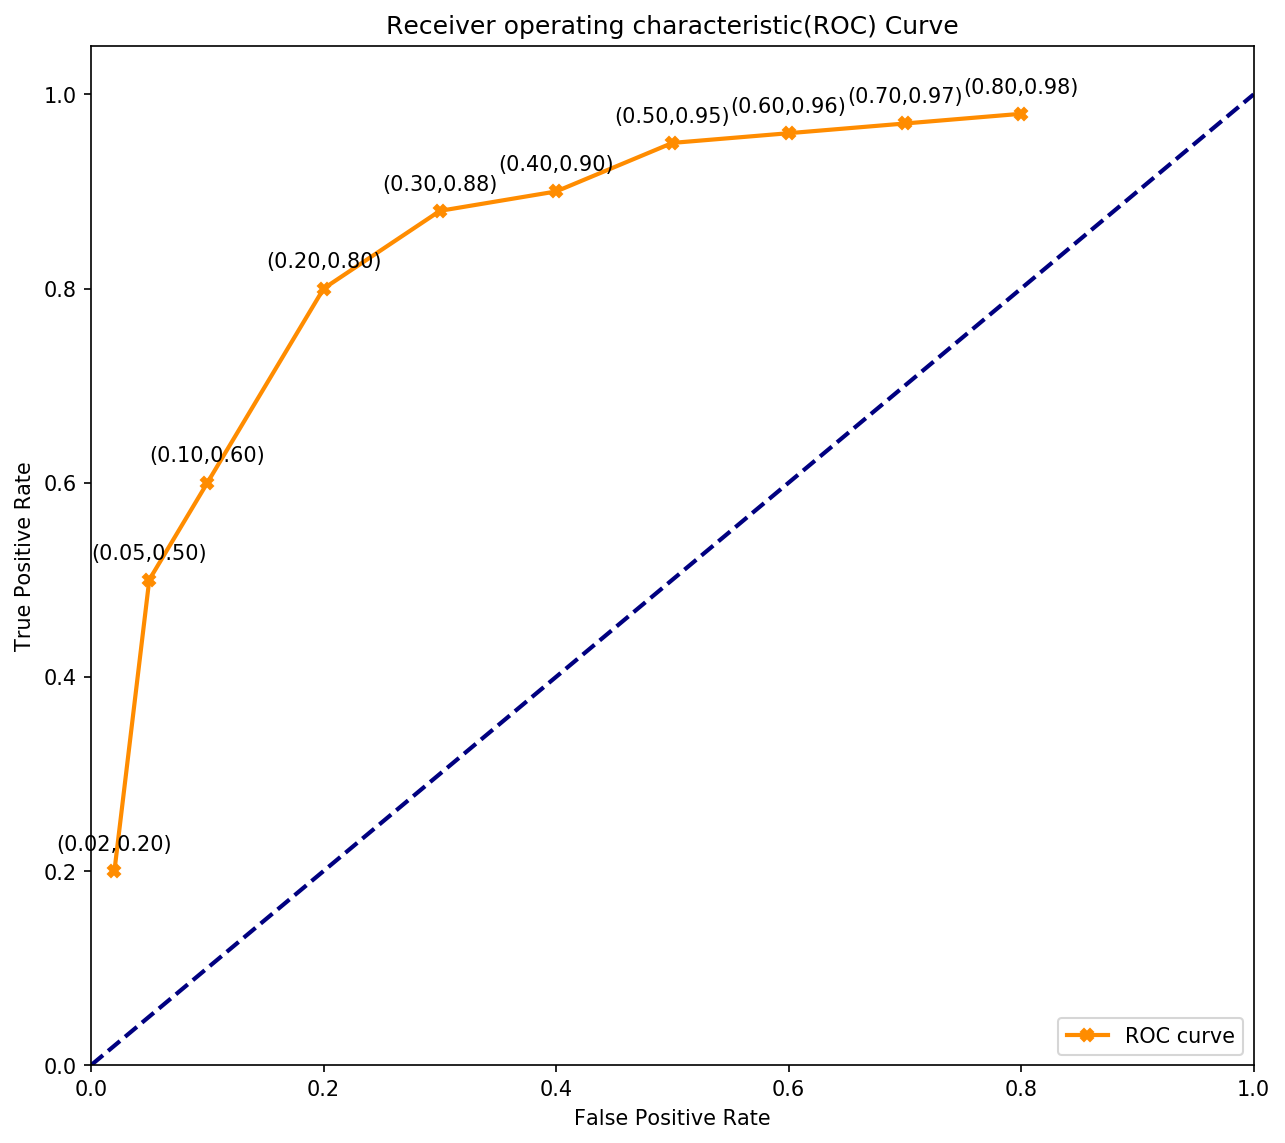

In [6]:
plt.figure(figsize=(10,9),dpi=150)
plt.plot(fpr, recall, color='darkorange',
         lw=2, label='ROC curve', marker="X")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
for x,y in zip(fpr,recall):
    label = '('+str("{:.2f}".format(x))+','+str("{:.2f}".format(y))+')'
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## DET Curve
### A detection error tradeoff (DET) graph is a graphical plot of error rates for binary classification systems, plotting the false rejection rate vs. false acceptance rate. The x- and y-axes are scaled non-linearly by their standard normal deviates (or just by logarithmic transformation), yielding tradeoff curves that are more linear than ROC curves, and use most of the image area to highlight the differences of importance in the critical operating region.

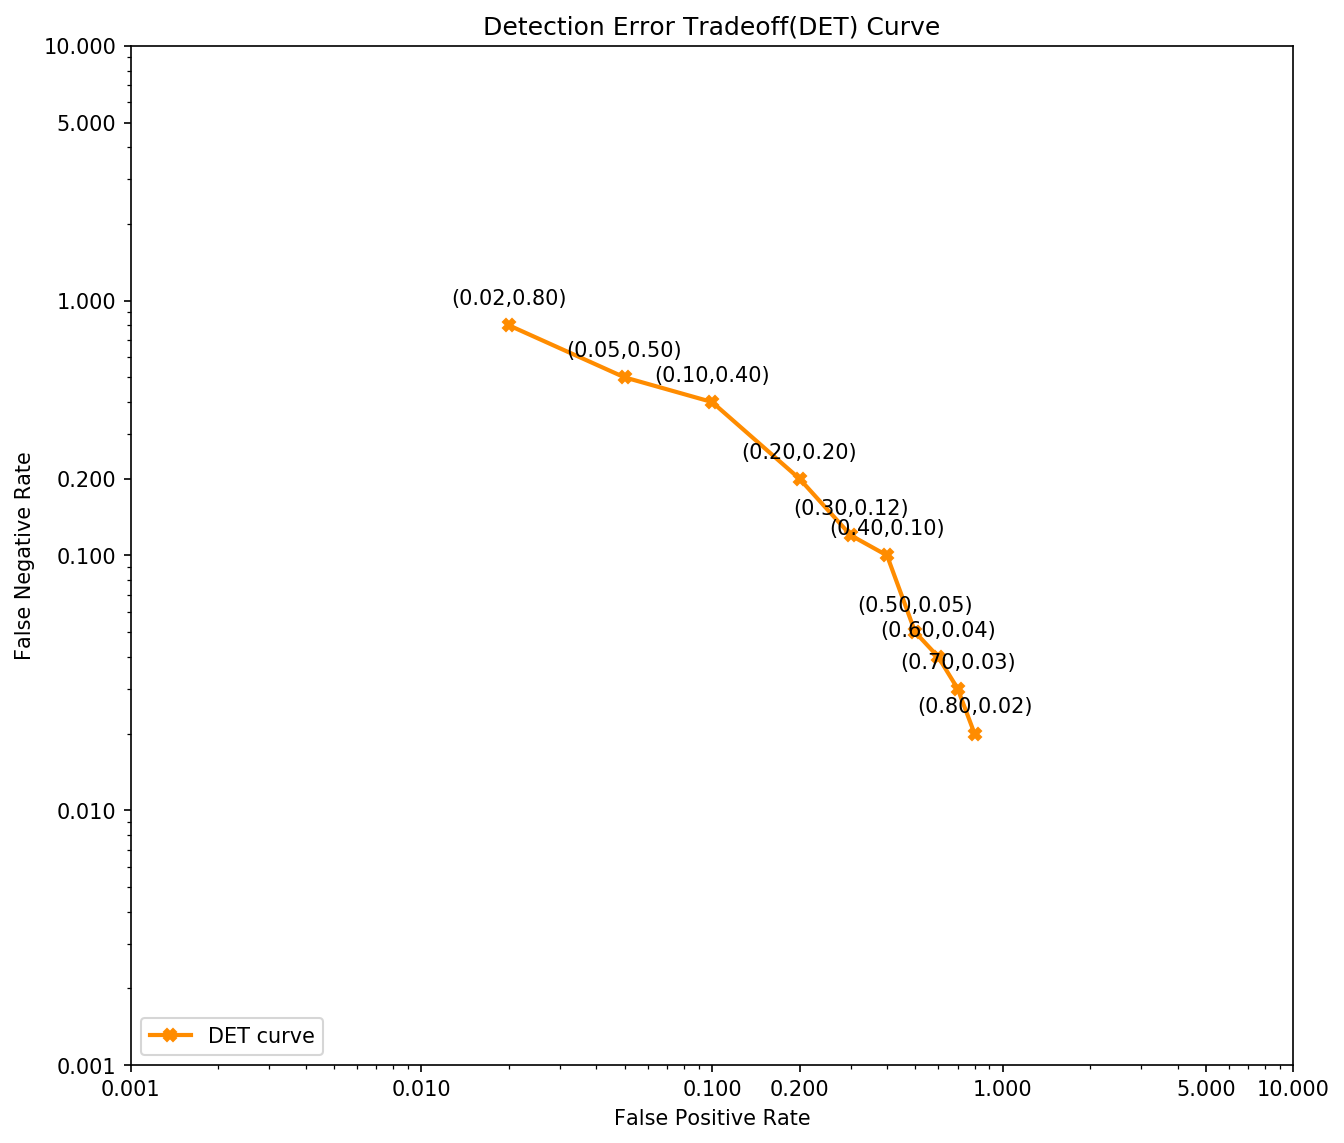

In [17]:
fig,ax = plt.subplots(figsize=(10,9),dpi=150)
plt.plot(fpr, fnr, color='darkorange',
         lw=2, label='DET curve', marker="X")

ticks_to_use = [0.001,0.01,0.1,0.2,1,5,10]

plt.yscale('log')
plt.xscale('log')

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_xticks(ticks_to_use)
ax.set_yticks(ticks_to_use)



for x,y in zip(fpr,fnr):
    label = '('+str("{:.2f}".format(x))+','+str("{:.2f}".format(y))+')'
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

    
plt.xlabel('False Positive Rate')
plt.ylabel('False Negative Rate')
plt.title('Detection Error Tradeoff(DET) Curve')
plt.legend(loc="lower left")
plt.show()